**Problam statement**

We can predict the level of air pollution (e.g., AQI, PM2.5, or other pollutants) in a given city and date, using historical air quality data and potentially other relevant factors like weather conditions or seasonality.

**Objective**

The objective of this EDA project is to **analyze and interpret air quality data across different cities and time periods** to uncover trends, patterns, and insights. Specifically, the project aims to:

1. **Understand Pollution Levels**: Identify key pollutants and their contribution to air quality degradation.
2. **City-Wise Comparison**: Compare air quality indices and pollutant levels across cities to determine the most and least polluted regions.
3. **Temporal Patterns**: Explore temporal trends (daily, monthly, or yearly) in pollution levels and AQI to identify seasonal effects or long-term trends.
4. **Data Completeness and Quality**: Investigate missing data, outliers, and inconsistencies, and apply suitable imputation or cleaning methods.
5. **Insights for Policy**: Generate actionable insights to assist policymakers and stakeholders in implementing effective air quality management strategies.

**Description:**

This dataset provides daily air quality data for various cities, capturing key environmental indicators over time. It includes measurements of multiple air pollutants and their corresponding Air Quality Index (AQI), offering insights into urban air pollution trends. The dataset contains 16 columns with information on pollutant concentrations and air quality categorization. The main features include:

* City: The name of the city where data was collected.

* Date: The specific date of each observation.

* Pollutants: Concentrations of pollutants such as PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, and Xylene.

* AQI: A numerical value representing air quality, derived from pollutant concentrations.

* AQI_Bucket: The qualitative category of AQI (e.g., Good, Moderate, Poor).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('city_day.csv')

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Understanding data

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Basic visulization

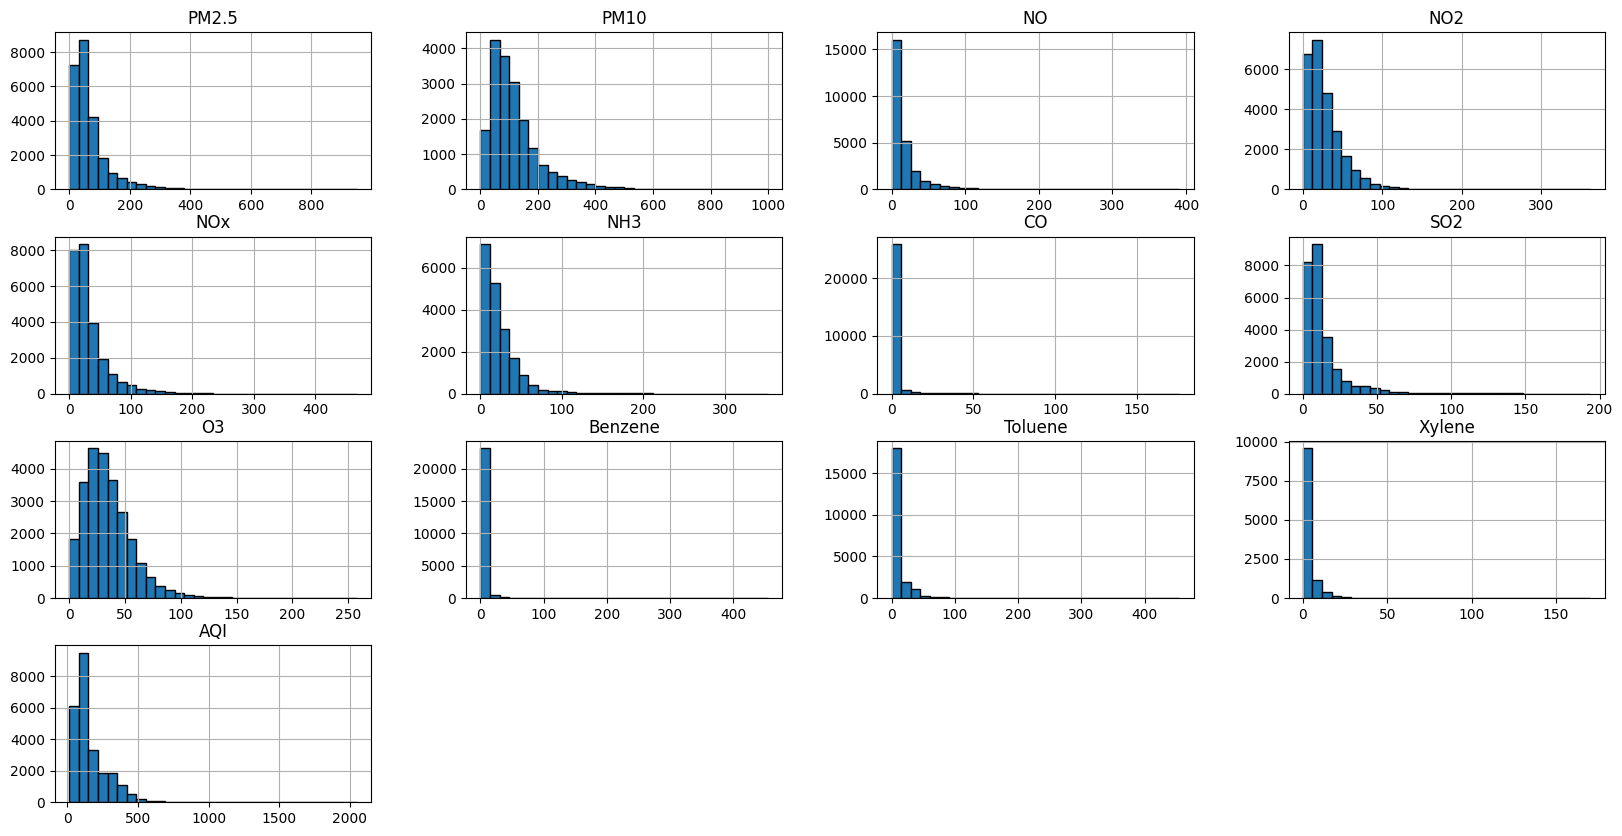

In [ ]:
df.hist(figsize=(20,10),bins=30,edgecolor='black')
plt.show()

# Data cleaning

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# craeting new columna for each day,month,year

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [ ]:
# droping date column because we made a separte cloumn for date day month
df.drop('Date',axis=1,inplace=True)

In [ ]:
# droping Xylene column because so many null values
df.drop(columns=['Xylene'], inplace=True)

In [ ]:
# droping AQI_Bucket column because it is a categorical value we only need numerical
df.drop(columns=['AQI_Bucket'], inplace=True)

In [ ]:
df.sample(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
7053,Brajrajnagar,94.33,187.93,22.33,18.74,36.54,43.34,3.20,7.37,10.39,0.00,NaN,197.0,13,3,2019
19773,Kolkata,14.57,30.86,3.92,7.56,11.52,12.55,0.34,6.68,31.48,1.23,5.7,45.0,20,4,2020


In [ ]:
# filling the all null values with median because it as skewness

df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['NOx'] = df['NOx'].fillna(df['NOx'].median())
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].median())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

In [ ]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
labelencoder = LabelEncoder()

df['City'] = labelencoder.fit_transform(df['City'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  int64  
 1   PM2.5    29531 non-null  float64
 2   PM10     29531 non-null  float64
 3   NO       29531 non-null  float64
 4   NO2      29531 non-null  float64
 5   NOx      29531 non-null  float64
 6   NH3      29531 non-null  float64
 7   CO       29531 non-null  float64
 8   SO2      29531 non-null  float64
 9   O3       29531 non-null  float64
 10  Benzene  29531 non-null  float64
 11  Toluene  29531 non-null  float64
 12  AQI      29531 non-null  float64
 13  day      29531 non-null  int32  
 14  month    29531 non-null  int32  
 15  year     29531 non-null  int32  
dtypes: float64(12), int32(3), int64(1)
memory usage: 3.3 MB


In [ ]:
df.sample(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
18844,16,48.57,152.03,25.24,11.15,23.52,9.03,0.38,23.30,34.49,1.07,2.97,132.0,6,6,2020
15678,14,76.33,160.28,12.40,63.88,41.36,23.67,1.05,15.67,52.74,3.50,20.49,164.0,5,1,2018


# Correlation

In [ ]:
df.corr()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.121778,0.000181,0.018314,0.032550
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.633654,-0.009835,0.041722,-0.170771
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.447686,-0.019463,-0.012204,-0.067119
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.438039,-0.003483,0.026233,0.009100
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.531952,-0.006954,0.033157,-0.041194
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.436282,-0.006290,0.022637,-0.003627
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,0.097916,0.001734,0.013439,-0.116269
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.650475,0.001251,-0.001473,-0.057421
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.454182,-0.002498,-0.025747,0.059695
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.199100,-0.003337,-0.081535,-0.005868


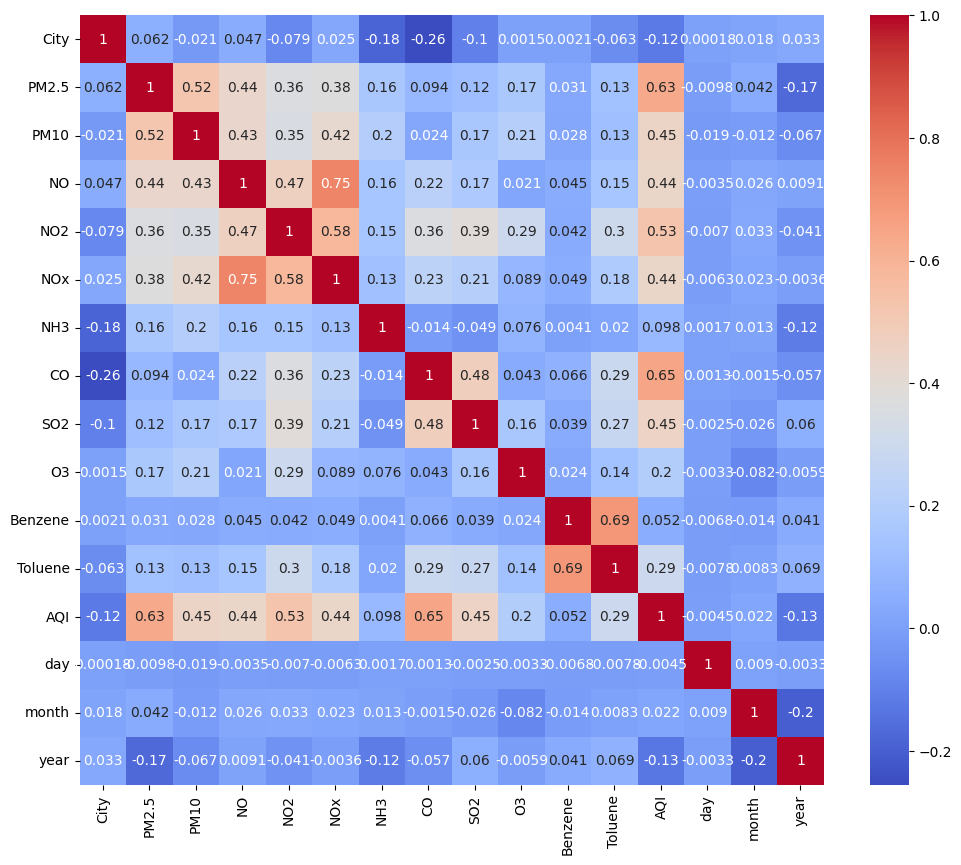

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [ ]:
AQI_corr = df.corr()['AQI'].sort_values(ascending=False)
AQI_corr

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

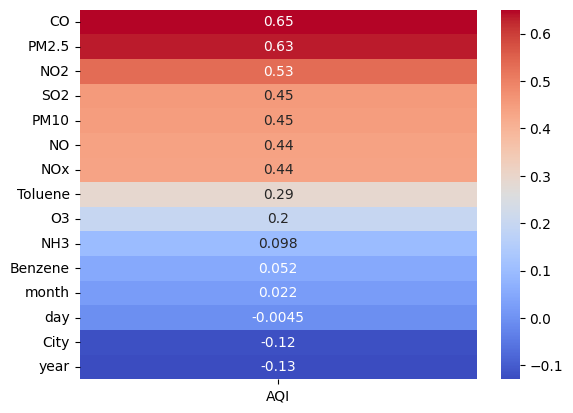

In [ ]:
AQI_corr = AQI_corr.drop('AQI')



sns.heatmap(AQI_corr.to_frame(), annot=True,cmap='coolwarm')
plt

In [ ]:
df=df.drop(['Benzene', 'City','year','day','month','NH3','O3','Toluene','NO','NO2'],axis=1)

In [ ]:
df.sample(2)

,PM2.5,PM10,NOx,CO,SO2,AQI
18350,58.89,107.66,23.52,0.89,41.58,128.0
19464,31.52,60.80,17.01,0.38,3.11,79.0


# Checking Skewness

In [ ]:
df['PM2.5']=np.log1p(df['PM2.5'])

In [ ]:
df['PM10']=np.log1p(df['PM10'])

In [ ]:
df['NOx']=np.log1p(df['NOx'])

In [ ]:
df['CO']=np.log1p(df['CO'])

In [ ]:
df['SO2']=np.log1p(df['SO2'])

In [ ]:
df['AQI']=np.log1p(df['AQI'])

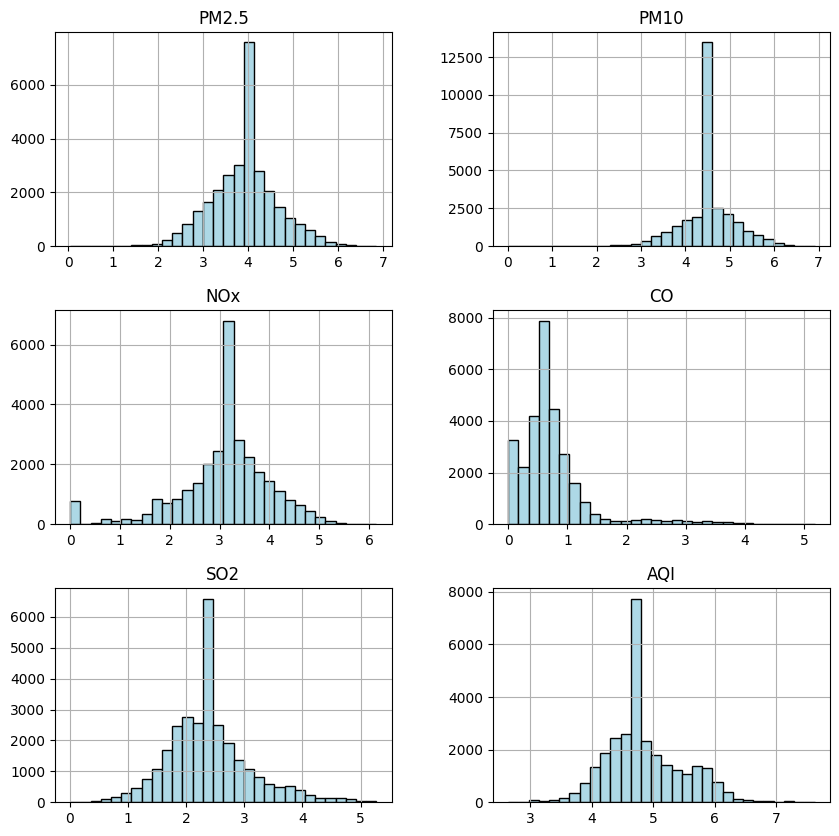

In [ ]:
df.hist(color='lightblue',figsize=(10,10),bins=30,edgecolor='black')
plt.show()

In [ ]:
df.shape

(29531, 6)

# Outlier detection

<Axes: >

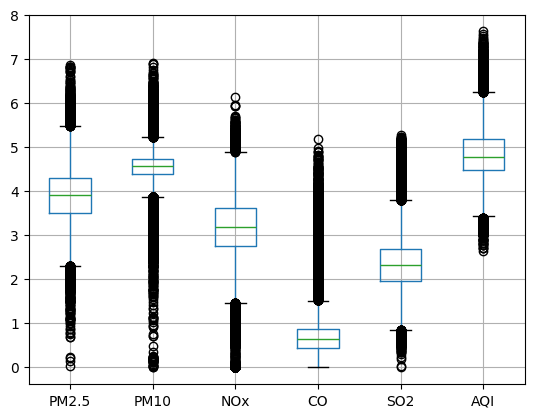

In [ ]:
df.boxplot()

## Outlier removing

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df):
    for col in df.columns:
        # Skip the specified column

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df)
df_cleaned


,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
56,3.903386,4.571407,3.199489,0.636577,2.318458,4.779123
...,...,...,...,...,...,...
29523,3.565581,4.520701,2.647592,0.444686,2.478218,4.465908
29524,2.670694,4.086648,2.645465,0.343590,2.218116,4.356709
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107


In [ ]:
df_cleaned=df

<Axes: >

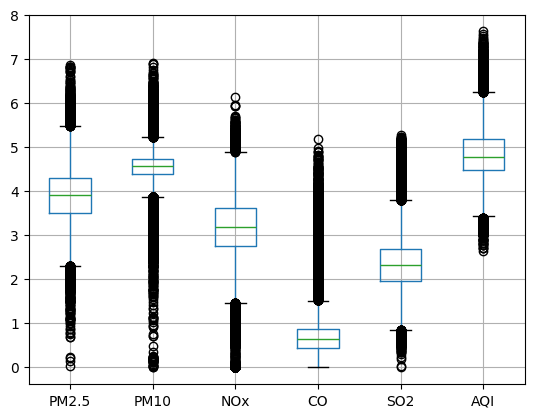

In [ ]:
df.boxplot()

# Scaled Data Prediction standard()

In [ ]:
df.sample()


,PM2.5,PM10,NOx,CO,SO2,AQI
9330,3.814851,4.571407,2.929592,0.698135,2.228939,4.75359


In [ ]:
df2=df #making df2 for standardscalar()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is called 'df'
# Select the features you want to scale
features = ['PM2.5','PM10','NOx','CO','SO2']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

# You can now use 'scaled_df' for further analysis or modeling

In [ ]:
x=df2[['PM2.5','PM10','NOx','CO','SO2']]
y=df['AQI']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([4.61160822, 4.61160822, 4.92580384, ..., 4.89387187, 4.45220613,
       4.82999657])

In [ ]:
# model eveution

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse) #it should be around 0
print('R-squared score :',r2)    #it should be around 1

Mean Squared Error: 0.08077223599504003
R-squared score : 0.776649177497484


## Prediction

In [ ]:
df.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
2345,2.703373,3.911423,2.392426,0.285179,2.017566,4.304065


In [ ]:


PM25 = float(input('Enter PM2.5:'))
PM10 = float(input('Enter PM10 :'))
NOx = float(input('Enter NOx :'))
CO = float(input('Enter CO:'))
SO2 = float(input('Enter SO2 :'))

user_input =[[PM25,PM10,NOx,CO,SO2]]

AQI = model.predict(user_input)

print('Predicated sales :',AQI)

Enter PM2.5:2.703373
Enter PM10 :3.911423
Enter NOx :2.392426
Enter CO:0.285179
Enter SO2 :2.017566
Predicated sales : [3.97995396]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scaled data Prediction minmax()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called 'df'
# Select the features you want to scale
features = ['PM2.5','PM10','NOx','CO','SO2']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

# You can now use 'scaled_df' for further analysis or modeling


In [ ]:
df1 = scaled_df #df1 for minimaxscalar()

In [ ]:
df1

,PM2.5,PM10,NOx,CO,SO2
0,0.566736,0.661195,0.471343,0.126051,0.635622
1,0.566736,0.661195,0.465041,0.131019,0.613927
2,0.566736,0.661195,0.556808,0.562765,0.644881
3,0.566736,0.661195,0.478528,0.191930,0.563452
4,0.566736,0.661195,0.594715,0.606722,0.700668
...,...,...,...,...,...
29526,0.401071,0.571134,0.491458,0.074446,0.426919
29527,0.468555,0.624563,0.465691,0.080909,0.495770
29528,0.459804,0.607454,0.481585,0.075756,0.424315
29529,0.415200,0.568401,0.485491,0.080909,0.450996


In [ ]:
x=df1[['PM2.5','PM10','NOx','CO','SO2']]
y=df['AQI']

In [ ]:
x

,PM2.5,PM10,NOx,CO,SO2
0,0.566736,0.661195,0.471343,0.126051,0.635622
1,0.566736,0.661195,0.465041,0.131019,0.613927
2,0.566736,0.661195,0.556808,0.562765,0.644881
3,0.566736,0.661195,0.478528,0.191930,0.563452
4,0.566736,0.661195,0.594715,0.606722,0.700668
...,...,...,...,...,...
29526,0.401071,0.571134,0.491458,0.074446,0.426919
29527,0.468555,0.624563,0.465691,0.080909,0.495770
29528,0.459804,0.607454,0.481585,0.075756,0.424315
29529,0.415200,0.568401,0.485491,0.080909,0.450996


In [ ]:
y

,AQI
0,4.779123
1,4.779123
2,4.779123
3,4.779123
4,4.779123
...,...
29526,3.737670
29527,4.262680
29528,4.234107
29529,4.007333


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model1.predict(x_test)
y_pred

array([4.61160822, 4.61160822, 4.92580384, ..., 4.89387187, 4.45220613,
       4.82999657])

In [ ]:
# model eveution

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse) #it should be around 0
print('R-squared score :',r2)    #it should be around 1

Mean Squared Error: 0.08077223599504003
R-squared score : 0.776649177497484


# Another method

In [ ]:
# df.sample()

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# # Regression algorithms
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
# X = df[['PM2.5', 'PM10', 'NOx','CO','SO2']]  # Features
# y = df['AQI']  # Target variable

In [ ]:
# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train

In [ ]:
# y_train

In [ ]:
# # Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# # List of linear regression models to apply
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(),
#     "Lasso Regression": Lasso(),
#     "ElasticNet Regression": ElasticNet(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
#     "Support Vector Regressor": SVR(),
#     "K-Nearest Neighbors": KNeighborsRegressor(),
#     "Neural Network": MLPRegressor(max_iter=1000)
# }

In [ ]:
# # Function to evaluate model performance
# def evaluate_model(y_true, y_pred):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     r2 = r2_score(y_true, y_pred)
#     return mae, rmse, r2

In [ ]:
# # Dictionary to store the results
# results = {}

In [ ]:
# # Apply each model and compute metrics
# for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
#                                    # Here "name" represents the "key", and "model" represents the "value"
#   if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
#         # Apply scaling for models that need it
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)
#   else:
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         # Compute evaluation metrics
#   mae, rmse, r2 = evaluate_model(y_test, y_pred)
#   results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
#   # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
#   # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# # Convert results to a DataFrame for better visualization
# results_df = pd.DataFrame(results).T
# print(results_df)

## Prediction

In [ ]:
df.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
2345,2.703373,3.911423,2.392426,0.285179,2.017566,4.304065


In [ ]:


PM25 = float(input('Enter PM2.5:'))
PM10 = float(input('Enter PM10 :'))
NOx = float(input('Enter NOx :'))
CO = float(input('Enter CO:'))
SO2 = float(input('Enter SO2 :'))

user_input =[[PM25,PM10,NOx,CO,SO2]]

AQI = model.predict(user_input)

print('Predicated sales :',AQI)

Enter PM2.5:2.703373
Enter PM10 :3.911423
Enter NOx :2.392426
Enter CO:0.285179
Enter SO2 :2.017566
Predicated sales : [3.97995396]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
